In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import linregress
import re
import warnings
warnings.filterwarnings('ignore')


In [154]:
def add_series(path):
    path1 = path
    #remove quotes
    path1 = path1.replace('"', '')
    #read into pandas
    global series1
    series1 = pd.read_csv(path1)
    if type(series1.iloc[0,-1]) == str:
        #change last column to float
        series1.iloc[:,-1] = series1.iloc[:,-1].str.replace(',', '').astype(float)
    #add change column
    add_change(series1)
    #add pct change column
    add_pct(series1)
    #rename date col
    series1.rename(columns={" Date":"Date"}, inplace = True)
    #convert Date col from object to datetime
    series1['Date'] = pd.to_datetime(series1['Date'], errors = 'ignore')
    #show heading
    return series1.head()
    

In [152]:
def add_change(series):
    #calculate change col for series1, convert strings to floats
    changes = [series.iloc[i,-1] - series.iloc[i-1,-1] for i in range (1,len(series))]
    #round the results
    change_clean = [float("{0:.3f}".format(x)) for x in changes]
    #create change column
    series.insert(1, 'change', np.nan_to_num(0))
    #insert the data from second row to the end
    series['change'][1:len(series)] = change_clean

In [153]:
def add_pct(series):
    #calculate percent change col for series1
    pct_change = [(series.iloc[i,-1]/series.iloc[i-1,-1] -1) * 100 for i in range(1,len(series))]
    #round the results
    pct_clean = [float("{0:.3f}".format(x)) for x in pct_change]
    #create pct_change column
    series.insert(1, 'pct_change', np.nan_to_num(0))
    #insert the data from second row to the end
    series['pct_change'][1:len(series)] = pct_clean
    

In [155]:
#add path for csv containting x-axis data
file1 = input("Paste path for the x-axis data: ")
#run add_series function to transform csv into a df with change and pct_change columns added
add_series(file1)
#define resulting df as indic1
indic1 = series1
#show column names
print(f'Column headers for 1st indictaor are: {indic1.columns}')
#show first five rows
indic1.head()

Paste path for the x-axis data: FX/koyfin_cl1.csv
Column headers for 1st indictaor are: Index(['Date', 'pct_change', 'change', 'CL1 Close', 'CL1 Adj. Close'], dtype='object')


,Date,pct_change,change,CL1 Close,CL1 Adj. Close
0,2020-05-11,0.000,0.00,24.39,24.39
1,2020-05-08,1.435,0.35,24.74,24.74
2,2020-05-07,-4.810,-1.19,23.55,23.55
3,2020-05-06,1.868,0.44,23.99,23.99
4,2020-05-05,2.376,0.57,24.56,24.56


In [156]:
#pick column you want to chart
x_col = input('Enter column header for x-axis that you want to chart: ')
#set x_data to that column
x_df = indic1[["Date", x_col]]
# x_data = indic1[x_col]
# x_date = indic1[" Date"]

Enter column header for x-axis that you want to chart: CL1 Adj. Close


In [203]:
#add path for csv containting y-axis data
file2 = input("Paste path for y-axis data: ")
#run add_series function to transform csv into a df with change and pct_change columns added
add_series(file2)
#show columns
indic2 = series1
#show column names
print(f'Column headers for 2nd indictaor are: {indic2.columns}')
#show first five rows 
indic2.head()

Paste path for y-axis data: FX/koyfin_cad.csv
Column headers for 2nd indictaor are: Index(['Date', 'pct_change', 'change', 'CADUSD Close', 'CADUSD Adj. Close'], dtype='object')


,Date,pct_change,change,CADUSD Close,CADUSD Adj. Close
0,2020-05-11,0.000,0.000,0.7135,0.7135
1,2020-05-08,0.631,0.004,0.7180,0.7180
2,2020-05-07,-0.320,-0.002,0.7157,0.7157
3,2020-05-06,-1.230,-0.009,0.7069,0.7069
4,2020-05-05,0.707,0.005,0.7119,0.7119


In [204]:
#pick column you want to chart
y_col = input('Enter column header for y-axis: ')
#set y_data to that column
y_df = indic2[["Date", y_col]]
# y_data = indic2[y_col]
# y_date = indic2[" Date"]

Enter column header for y-axis: CADUSD Adj. Close


In [205]:
#print number of rows for each data set
print(f'X data is {len(x_df)} rows long.')
print(f'Y data is {len(y_df)} rows long.')

X data is 5214 rows long.
Y data is 5216 rows long.


In [206]:
#inner merge df's
df = pd.merge(x_df, y_df, how='inner', on='Date')
print(f'Merged df is {len(df)} rows long')
df.head()


Merged df is 5050 rows long


,Date,CL1 Adj. Close,CADUSD Adj. Close
0,2020-05-11,24.39,0.7135
1,2020-05-08,24.74,0.7180
2,2020-05-07,23.55,0.7157
3,2020-05-06,23.99,0.7069
4,2020-05-05,24.56,0.7119


In [207]:
df = df.loc[df['Date'] >= '2010-05-11']

In [208]:
#define label names
label_x = indic1.columns[-1]
label_y = indic2.columns[-1]
#remove Adj. Close with regex
label_x = re.sub('\ Adj. Close', '', label_x)
label_y = re.sub('\ Adj. Close', '', label_y)

#define x_data
x_data = df.iloc[:,1]
y_data = df.iloc[:,2]
date = df.iloc[:,0]

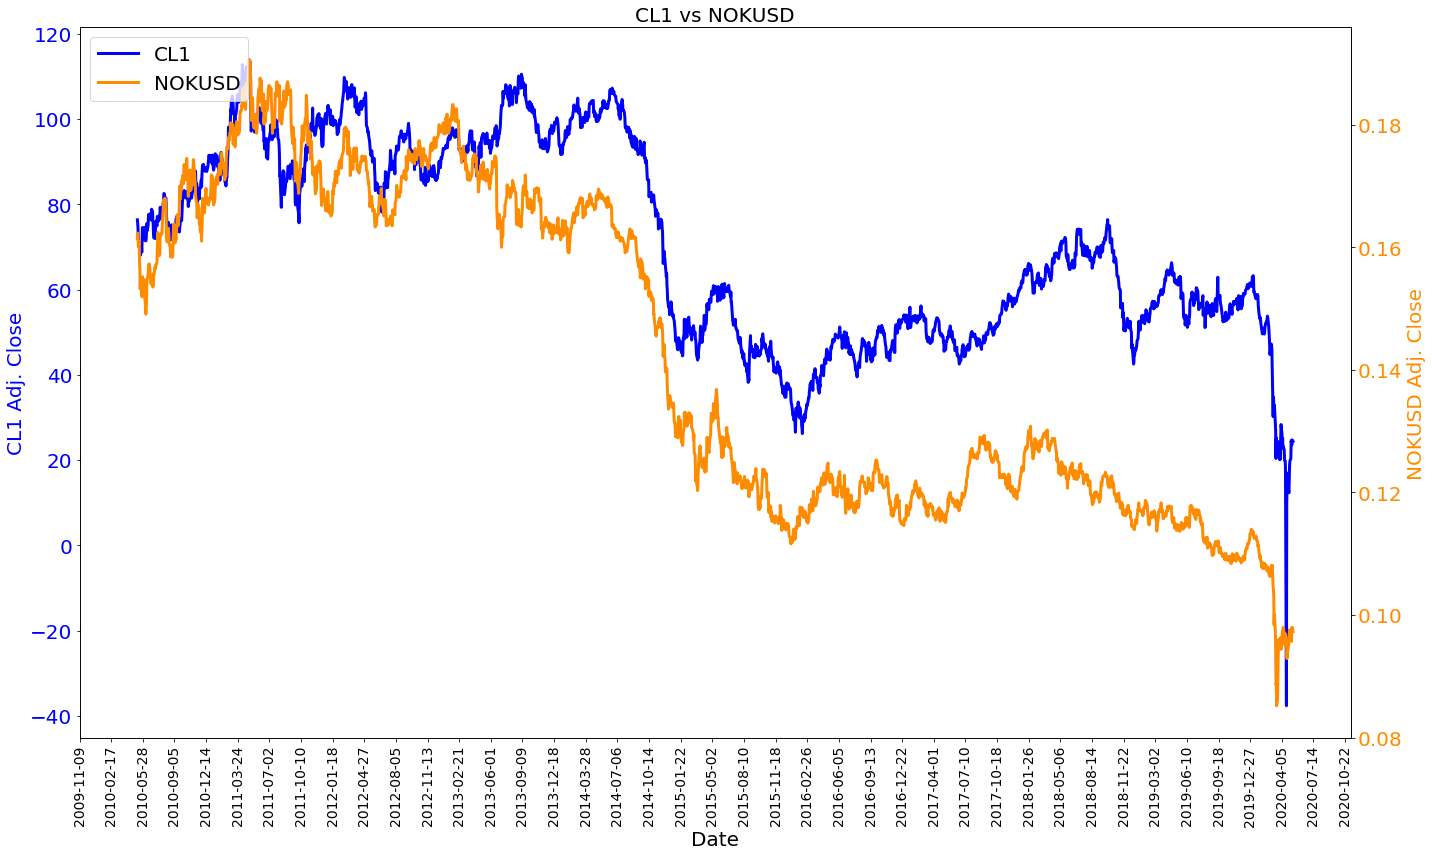

In [201]:
#draw line chart
fig,ax1 = plt.subplots(figsize=(20,12))
ax1.set_title(f"{label_x} vs {label_y}", fontsize=20)
ax1.set_xlabel("Date", fontsize=20)
ax1.set_ylabel(x_col, fontsize=20, color="blue")
ax1.plot(date, x_data, color = "blue", label=f"{label_x}", linewidth=3)
ax1.tick_params(axis='y', labelcolor="blue", labelsize=20)
start, end = ax1.get_xlim()
freq = len(x_date)/(len(x_date)/100)
ax1.set_xticks(np.arange(start, end,freq))
ax1.tick_params(axis='x', labelrotation=90, labelsize = 14)
ax2 = ax1.twinx()
ax2.set_ylabel(y_col, fontsize=20, color="darkorange")
ax2.plot(date,y_data, color = "darkorange", label=f"{label_y}", linewidth=3)
ax2.tick_params(axis='y', labelcolor="darkorange", labelsize=20)
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes, fontsize=20)
ax2.set_xticks(np.arange(start, end,freq))
fig.tight_layout()
plt.savefig(f"images/{label_x}_{label_y}_line.png")


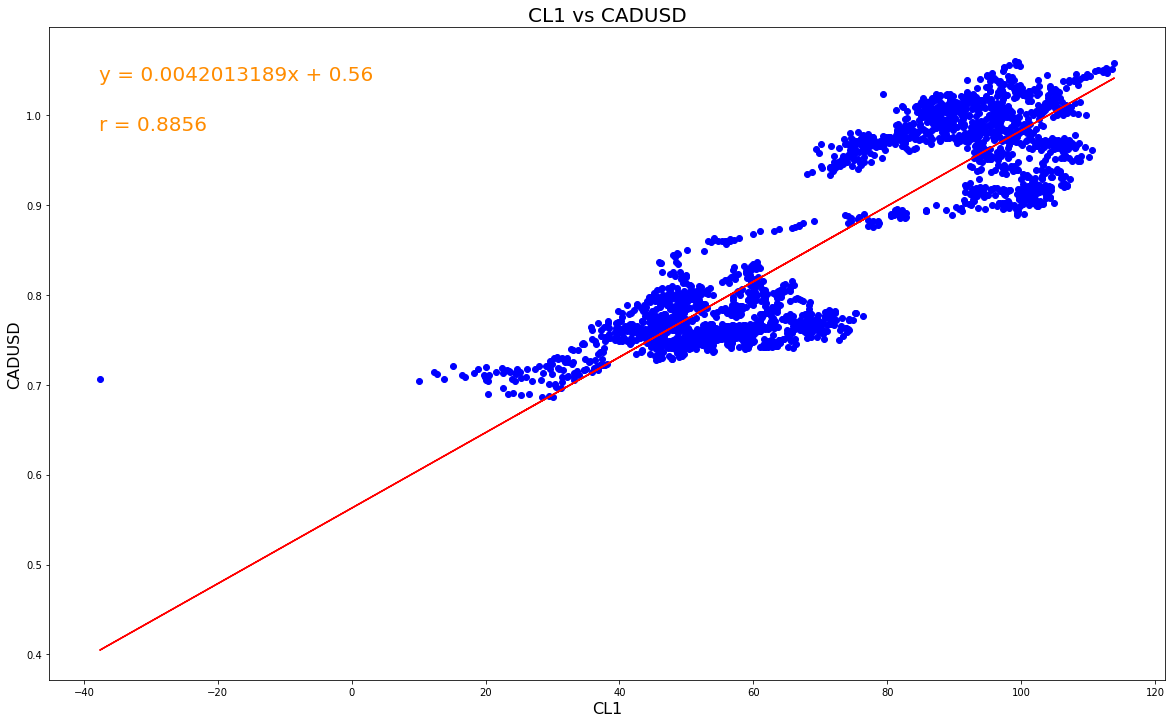

In [209]:
#draw regression chart
plt.figure(figsize=(20,12))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,10)) + "x + " + str(round(intercept,2))
plt.scatter(x_data,y_data, color="blue")
plt.plot(x_data,regress_values,"r-")
plt.annotate(line_eq,(50,600),fontsize=20,color="darkorange", xycoords="axes points")
plt.annotate(f'r = {str(round(rvalue,4))}',(50,550),fontsize=20,color="darkorange", xycoords="axes points")
plt.title(f'{label_x} vs {label_y}', fontsize=20)
plt.xlabel(label_x, fontsize=16)
plt.ylabel(label_y, fontsize=16)
plt.savefig(f"images/{label_x}_{label_y}_regress.png")